# `AirBNB Booking Analysis`

In [1]:
#Importing Necessary Librarires 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load Airbnb Dataset**

In [3]:
Airbnb_df = pd.read_csv('Airbnb_data.csv')
Airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#About Dataset - 
-contains 48895 rows and 16 columns

# Data Cleaning 

In [8]:
Airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#**Rename columns for better understanding**

In [11]:
rename_col = {'id':'Listing_id' , 'name':'listing_name','number_of_reviews':'total_reviews' ,'calculated_host_listings_count':'host_listings_count'}
Airbnb_df = Airbnb_df.rename(columns=rename_col)
Airbnb_df.head(2)

,Listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [13]:
#Overview of dataset

Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

**So there are numerical and categorical varibles**

In [16]:
#Checking Duplicates

Airbnb_df1 =Airbnb_df.duplicated().sum()
Airbnb_df1

0

In [18]:
Airbnb_df.drop_duplicates().count() 

Listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

**so , there no duplicates**

In [21]:
#Checking Null values

Airbnb_df.isnull().sum()

Listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

**listing_name and host_name dont have much null values** 

In [24]:
Airbnb_df['listing_name'].fillna('unknown', inplace=True)
Airbnb_df['host_name'].fillna('no_name', inplace=True)

In [26]:
Airbnb_df[['listing_name','host_name']].isnull().sum()

listing_name    0
host_name       0
dtype: int64

**last_review and reviews_per_month have 10052 null values each**

**last_review is not requiered for our anlysis , so dropping it.**

In [29]:
Airbnb_df.drop(['last_review'],axis=1 , inplace =True)

#**Replacing nan to 0 as no review**


In [32]:
Airbnb_df['reviews_per_month']= Airbnb_df['reviews_per_month'].replace(to_replace=np.nan, value=0).astype('int64')

In [34]:
Airbnb_df.isnull().sum()

Listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [36]:
Airbnb_df.sample(5)

,Listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
25251,20196860,Comfy and Convenient Private Astoria Room,73028890,Esther,Queens,Astoria,40.75645,-73.91458,Private room,50,4,1,0,1,0
29659,22777530,Private bedroom in Gorgeous Brooklyn Apartment!,160054295,Cesar,Brooklyn,Crown Heights,40.67582,-73.94054,Private room,47,1,5,0,1,0
47972,36007006,Centrally Located 1BDR With Furnished Patio,270906714,Jennifer,Manhattan,Hell's Kitchen,40.75654,-73.99173,Entire home/apt,320,3,0,0,1,341
16273,13109933,Luxury condo with views in Brooklyn,1642326,Steve,Brooklyn,Downtown Brooklyn,40.69202,-73.98469,Entire home/apt,225,3,36,1,1,53
1545,698882,The Serenity Room in Historic BKLYN,2994135,Devin & Justin,Brooklyn,Cobble Hill,40.68902,-73.99517,Private room,69,2,13,0,1,0


**Checking Unique Listing**

In [40]:
Airbnb_df['Listing_id'].nunique()

#unique gives values , nunique gives no. of unique values

48895

In [42]:
Airbnb_df['neighbourhood'].nunique()

221

In [44]:
Airbnb_df['neighbourhood_group'].nunique()

5

In [48]:
Airbnb_df['neighbourhood_group'].unique()

#There are 5 groups where listing is seen 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [50]:
Airbnb_df['host_name'].nunique()

11453

In [52]:
# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

47906

In [54]:
Airbnb_df[Airbnb_df['host_name']== 'David']['listing_name'].nunique()

402

In [56]:
#host David operates diff 402 properties

Airbnb_df[Airbnb_df['host_name']== 'David']['listing_name'].unique()

array(['Prime East Village 1 Bedroom',
       'Room in Chic Modern High Line Luxury- New!',
       'Light Superhosted Chill LES Apt',
       'Spacious & Sunny in Prime Brooklyn', 'West Village Gem - 2BR',
       'Our NY home, Greenwich Village apt',
       'East Village Oasis!  1Bd Apt',
       'CLEAN PRIVATE ROOM IN CHELSEA NYC',
       'NYC/Queens 1 Bedroom Apartment',
       'Manhattan Sky Crib (1 year sublet)', 'Brooklyn two bedroom',
       'Prospect Park Modern 3 Bedroom',
       'Midtown Lux Manhattan by 5th Ave',
       'Spacious sunny bedroom - East Village (A)',
       'Huge 1br - tons of light - williamsburg',
       'Charming, light-filled 1-bedroom',
       'Cozy 1 BR Apt - Sunnyside, Queens',
       'Brownstone Penthouse Apartment',
       '3+ Bedroom Steps to Park Avenue',
       'Nice Bedroom in Central Bushwick!', 'The "Humphrey Bogart"',
       'MIDTOWN MANHATTAN-WALKING DISTANCE TO EMPIRE STATE',
       'COZY CLEAN BDR 3 MINUTE WALK FROM GRAND CENTRAL',
       'Priva

In [78]:
Airbnb_df[Airbnb_df['listing_name']== Airbnb_df['host_name']].head()

# few have same listing name and host name 

,Listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0,1,238
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0,18,180


# Describe dataset and removing outliers

In [61]:
Airbnb_df.describe()

,Listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


There are large number of outliers in price column


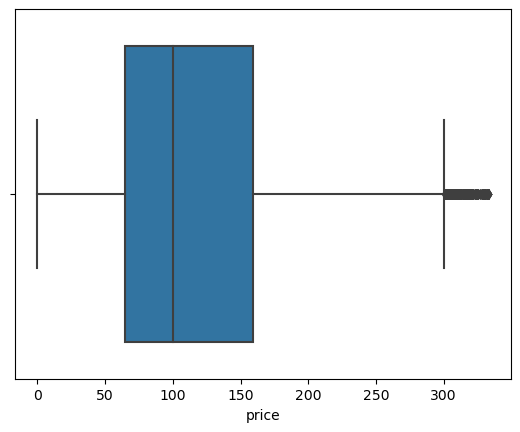

In [76]:
print("There are large number of outliers in price column")
sns.boxplot(x = Airbnb_df['price'] )
plt.show()

# USING IQR technique

In [66]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3-Q1
    lower_r = Q1 - (1.5*IQR)
    upper_r = Q3 + (1.5*IQR)
    
    return lower_r , upper_r

In [68]:
lower_ra, upper_ra= iqr_technique(Airbnb_df['price'])
lower_ra

-90.0

In [70]:
upper_ra

334.0

In [72]:
# Putting Price limit between IQR

Airbnb_df = Airbnb_df[(Airbnb_df.price>lower_ra) &(Airbnb_df.price<upper_ra)]


(45918, 15)


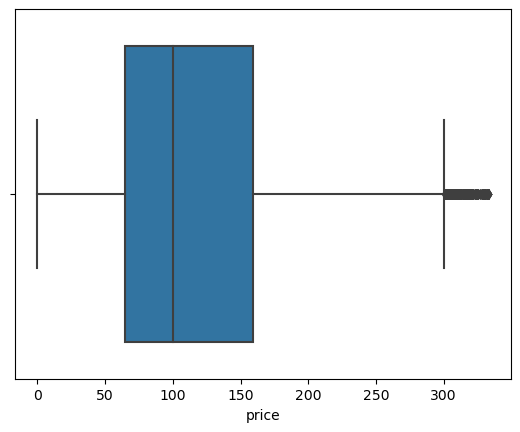

In [74]:
sns.boxplot(x=Airbnb_df['price'])
print(Airbnb_df.shape)

In [80]:
#so outliers are removed , checking min and max price
print(f"Minimum Price :{Airbnb_df['price'].min()}")
print(f"Maximum Price: {Airbnb_df['price'].max()}")

Minimum Price :0
Maximum Price: 333


# Exploratory Data Analysis    EDA 

C:\Users\Onkar\AppData\Local\Temp\ipykernel_14464\4022759036.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Airbnb_df['price'], color='r')


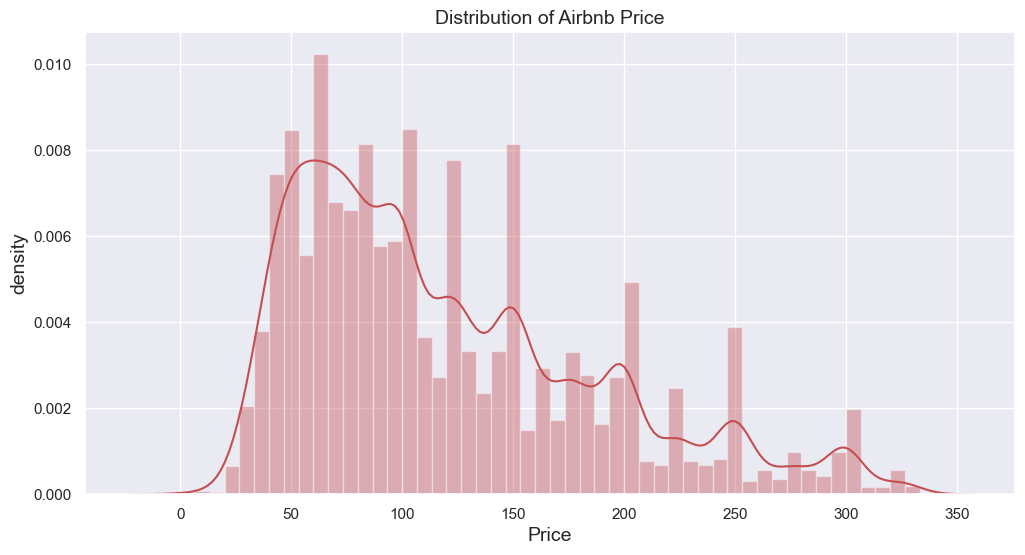

In [83]:
#Price Distribution using Histogram

plt.figure(figsize=(12,6))

sns.set_theme(style='darkgrid')

sns.distplot(Airbnb_df['price'], color='r')

plt.xlabel('Price', fontsize = 14)
plt.ylabel('density', fontsize=14)

plt.title('Distribution of Airbnb Price', fontsize =14)

plt.show()

Range of price is from **20 - 330 dollars** , majority falling in **50-150 dollars**.

In [86]:
counts = Airbnb_df['neighbourhood_group'].value_counts()

top_neigh_grp= counts.reset_index()

top_neigh_grp.columns = ['Neighborhood_Groups','Listing_Counts']

top_neigh_grp

,Neighborhood_Groups,Listing_Counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


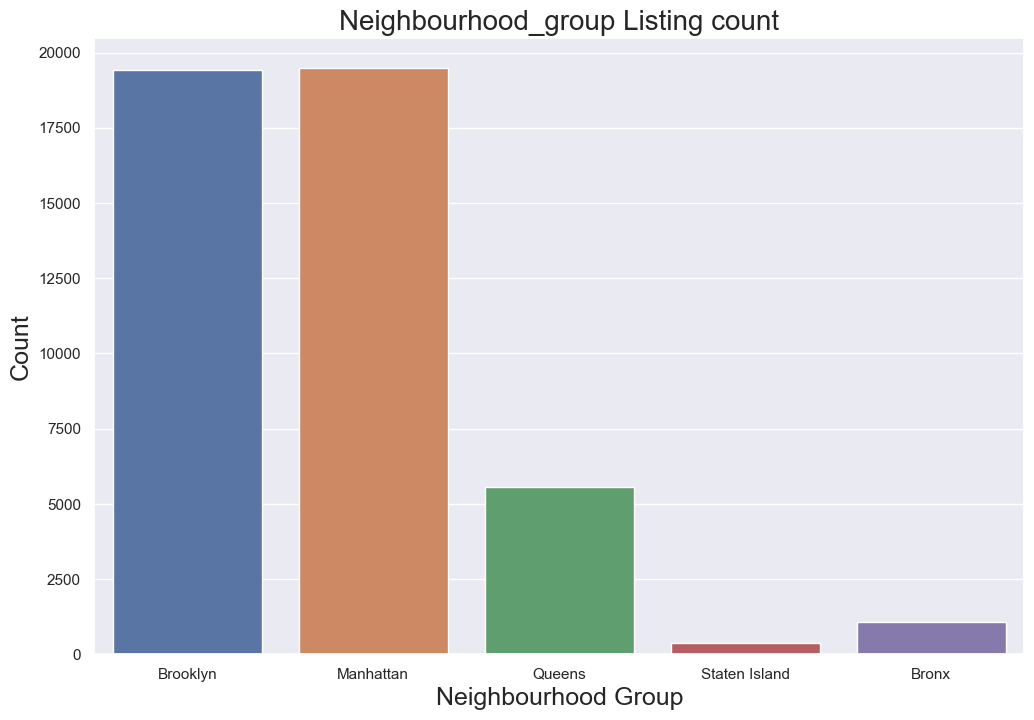

In [88]:
 plt.figure(figsize=(12,8))
    
sns.countplot(data=Airbnb_df,x= 'neighbourhood_group')

plt.title('Neighbourhood_group Listing count', fontsize =20)
plt.xlabel('Neighbourhood Group' ,fontsize =18)
plt.ylabel('Count',fontsize =18)
plt.show()

# Average Price of Each Neighbourhood group

In [93]:
grouped = Airbnb_df.groupby("neighbourhood_group").mean(numeric_only=True)

neighbourhood_group_avg_price = grouped.reset_index()

neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)

neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


**Manhattan and Brooklyn have highest number of listing over 19000 each and also have higher average price as compared to others**


**Stalen Island has least with only 365**

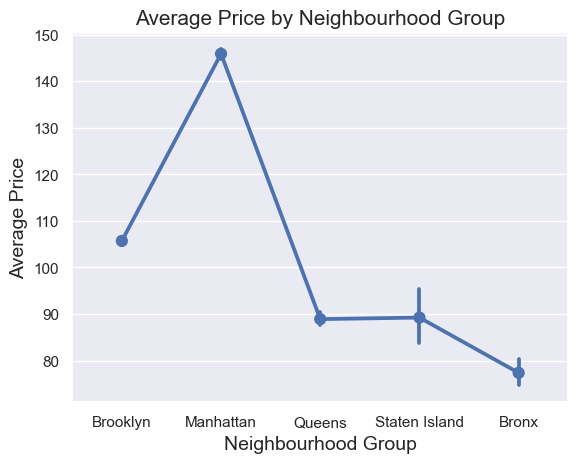

In [97]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=Airbnb_df, estimator = np.mean)

plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)
plt.show()

--Manhattan having highest 146 dollors/day average price and Bronx having 77 dollars/day

**Price Distribution of Each Neighbourhood**

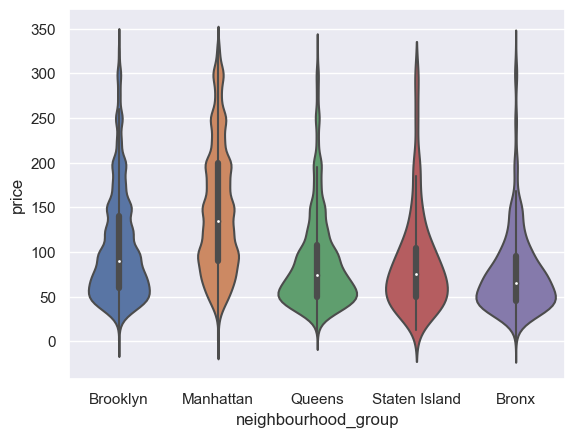

In [100]:
#Creating Violin Plot of Price distribution

vp = sns.violinplot(x='neighbourhood_group',y='price',data=Airbnb_df)


--Price distribution is very high in Manhattan and Brooklyn 

# Top neighbourhood by Listing

In [104]:
Airbnb_df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3732
Bedford-Stuyvesant    3638
Harlem                2585
Bushwick              2438
Upper West Side       1788
                      ... 
Silver Lake              2
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 219, dtype: int64

In [106]:
top_neigh = Airbnb_df['neighbourhood'].value_counts()[:10].reset_index()
top_neigh.columns = ['Top_neighbourhoods','Listing_counts']
top_neigh

,Top_neighbourhoods,Listing_counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


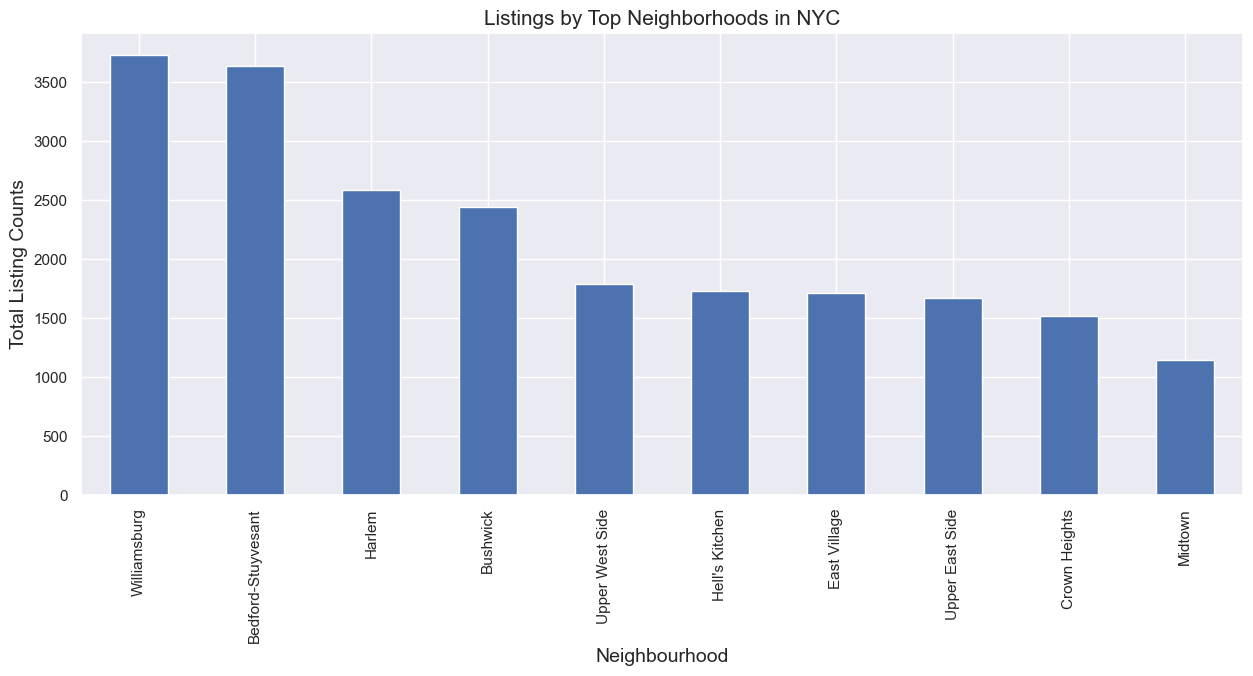

In [108]:
top_10_neigbourhoods = Airbnb_df['neighbourhood'].value_counts().nlargest(10)


top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6)) 

plt.xlabel('Neighbourhood', fontsize=14)

plt.ylabel('Total Listing Counts', fontsize=14)

plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

plt.show()

**Top Neighbourhood in NYC are Williamsburg , Bedford-Stuyvesant and Harlem**

# Top Hosts With More Listing/Property using Bar chart

In [113]:
top_10_hosts = Airbnb_df['host_name'].value_counts()[:10].reset_index()

top_10_hosts.columns = ['host_name', 'Total_listings']

top_10_hosts

,host_name,Total_listings
0,Michael,383
1,David,368
2,John,276
3,Sonder (NYC),272
4,Alex,253
5,Sarah,221
6,Daniel,212
7,Maria,197
8,Jessica,185
9,Mike,184


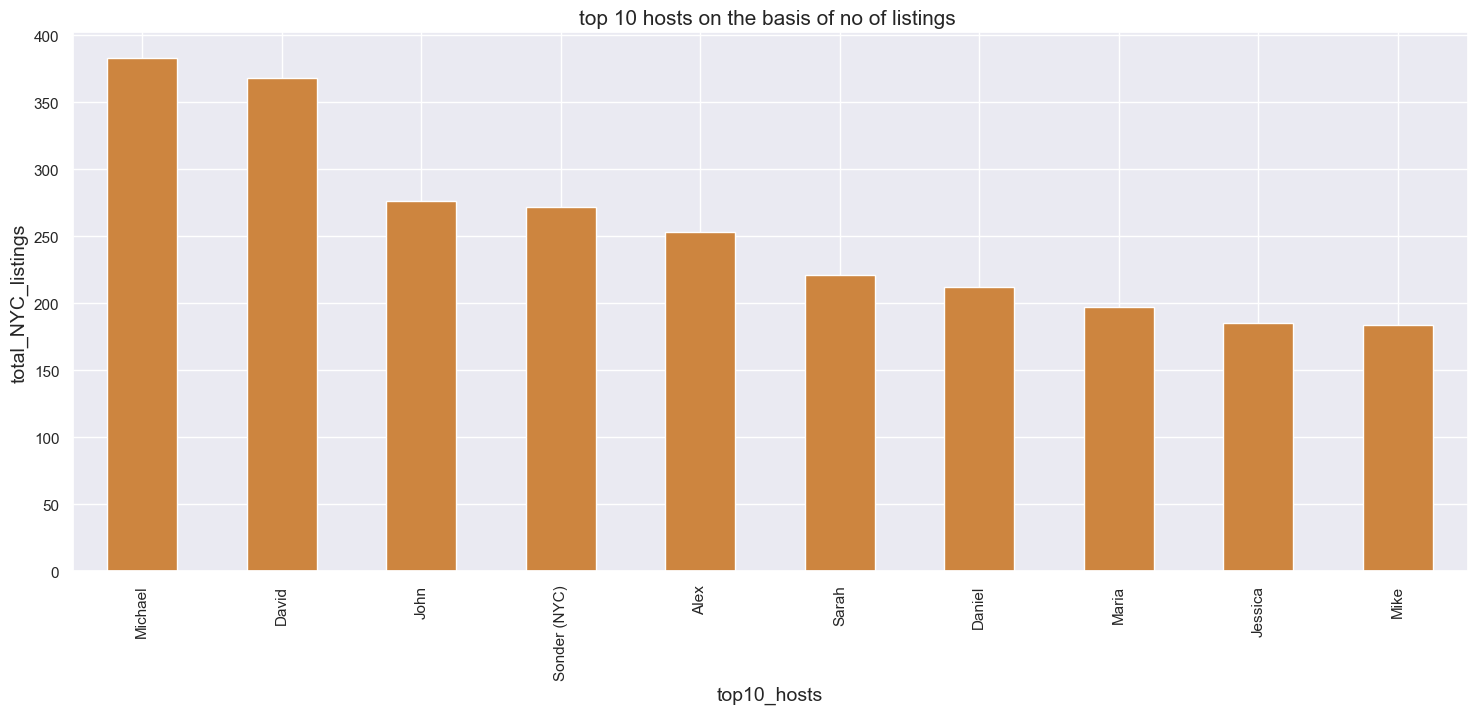

In [117]:
top_10_hosts = Airbnb_df['host_name'].value_counts()[:10]

top_10_hosts.plot(kind='bar', figsize=(18, 7),color='peru')

plt.xlabel('top10_hosts', fontsize=14)

plt.ylabel('total_NYC_listings', fontsize=14)

plt.title('top 10 hosts on the basis of no of listings ', fontsize=15)
plt.show()

-- Top 3 hosts are Micheal , David and John , having 383,368 and 276 listing resp.

# Total Counts Of Each Room Type

In [123]:
# create a new DataFrame that displays the number of listings of each room type 
top_room_type = Airbnb_df['room_type'].value_counts().reset_index()

top_room_type.columns = ['Room_Type', 'Total_counts']

top_room_type

,Room_Type,Total_counts
0,Entire home/apt,22784
1,Private room,21996
2,Shared room,1138


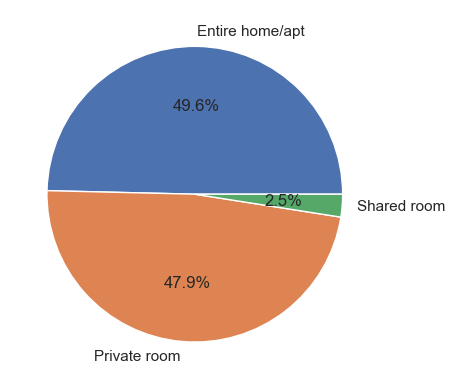

In [248]:
room_type_counts = Airbnb_df['room_type'].value_counts()

labels = room_type_counts.index
sizes = room_type_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

-- Majority of listing are Entire home or Private rooms and very few listing of shared room as compared to both of them

**Room Type in Neighbourhood group**

In [251]:
Airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         648
                     Entire home/apt      363
                     Shared room           59
Brooklyn             Private room       10062
                     Entire home/apt     8942
                     Shared room          411
Manhattan            Entire home/apt    11289
                     Private room        7747
                     Shared room          465
Queens               Private room        3351
                     Entire home/apt     2022
                     Shared room          194
Staten Island        Private room         188
                     Entire home/apt      168
                     Shared room            9
Name: count, dtype: int64

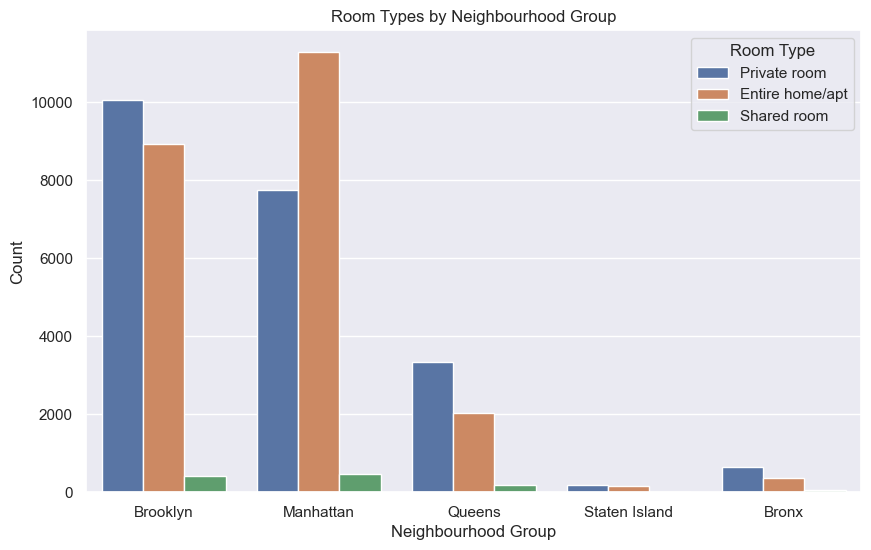

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Airbnb_df,x='neighbourhood_group',hue='room_type')

plt.title('Room Types by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()


**Calculate summary statistics for prices by Room Type**

In [202]:
room_type_summary = Airbnb_df.groupby('room_type')['price'].agg([np.mean, np.median, np.std])

print("\nSummary Statistics for Prices by Room Type:")
print(room_type_summary)


Summary Statistics for Prices by Room Type:
                       mean  median        std
room_type                                     
Entire home/apt  162.489466   150.0  63.339807
Private room      79.018503    70.0  41.177512
Shared room       59.293497    45.0  42.832023


# Correlation Heatmap Visualization

In [243]:
corr = Airbnb_df.corr(numeric_only=True)
corr

,Listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
Listing_id,1.000000,0.581439,-0.008072,0.101403,-0.018180,-0.013841,-0.320428,0.189768,0.125179,0.073188
host_id,0.581439,1.000000,0.015965,0.144330,-0.034812,-0.017972,-0.136529,0.216020,0.147276,0.193673
latitude,-0.008072,0.015965,1.000000,0.091354,0.068789,0.025853,-0.012515,-0.015752,0.021285,-0.017492
longitude,0.101403,0.144330,0.091354,1.000000,-0.306922,-0.064128,0.053831,0.135783,-0.107333,0.097181
price,-0.018180,-0.034812,0.068789,-0.306922,1.000000,0.031141,-0.027547,-0.041992,0.172891,0.066179
minimum_nights,-0.013841,-0.017972,0.025853,-0.064128,0.031141,1.000000,-0.082851,-0.117291,0.133237,0.146329
total_reviews,-0.320428,-0.136529,-0.012515,0.053831,-0.027547,-0.082851,1.000000,0.562593,-0.070357,0.183707
reviews_per_month,0.189768,0.216020,-0.015752,0.135783,-0.041992,-0.117291,0.562593,1.000000,-0.043678,0.156463
host_listings_count,0.125179,0.147276,0.021285,-0.107333,0.172891,0.133237,-0.070357,-0.043678,1.000000,0.225251
availability_365,0.073188,0.193673,-0.017492,0.097181,0.066179,0.146329,0.183707,0.156463,0.225251,1.000000


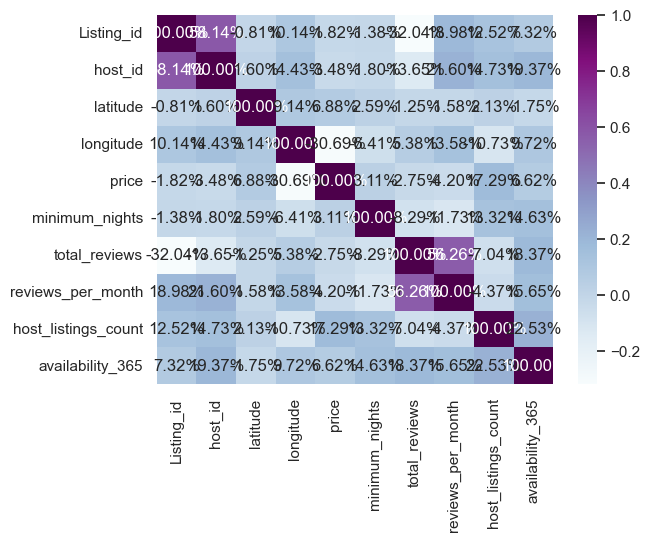

In [245]:
sns.heatmap(corr , cmap='BuPu',annot=True,fmt='.2%')

plt.show()

# Total Reviews by Each Neighborhood Group using Pie Chart


In [229]:
Airbnb_df.total_reviews.count()

45918

In [237]:
Airbnb_df.groupby("neighbourhood_group")["total_reviews"].sum()

neighbourhood_group
Bronx             28185
Brooklyn         475936
Manhattan        428128
Queens           155719
Staten Island     11536
Name: total_reviews, dtype: int64

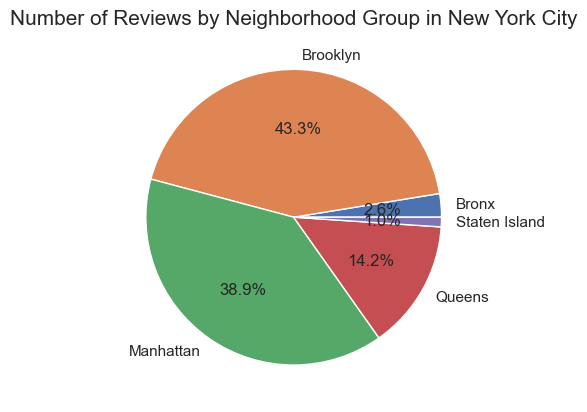

In [235]:
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].sum()

plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')

plt.show()


-- **Brooklyn** has largest share in total reviews with **43.3%** followed by **Manhattan with 38.9%**


# Availability of Property in each group

In [211]:
print(f"Number of Days Airbnb availble in NewYork :{Airbnb_df.availability_365.mean()}")

Number of Days Airbnb availble in NewYork :109.359357985975


In [217]:
print("**Availability per group**")
print(Airbnb_df.groupby('neighbourhood_group')['availability_365'].mean())

**Availability per group**
neighbourhood_group
Bronx            164.564486
Brooklyn          98.500644
Manhattan        105.837701
Queens           143.019041
Staten Island    199.893151
Name: availability_365, dtype: float64


--Average availability in days
Brooklyn has less availability which is almost 100 day in a year 
means there is higher number of bookings
Manhattan shows similar trends where availability is 105 days in year.

# Minimum Nights of Boooking

In [223]:
Airbnb_df.minimum_nights.mean().round()

#Average Minimum nights booking is 7 days

7.0

In [225]:
Airbnb_df.groupby('neighbourhood_group')['minimum_nights'].mean()

#Manhattan has 8 days average while Brooklyn has 6 days

neighbourhood_group
Bronx            4.598131
Brooklyn         6.021375
Manhattan        8.546331
Queens           5.072391
Staten Island    4.824658
Name: minimum_nights, dtype: float64

# Conclusion :-


*Manhatten and Brooklyn have the highest demand for Airbnb rentals. This can be attactive areas for hosts to invest in properties.
The price distribution is high in Manhattan and Brooklyn.

*People prefers Entire Apartment and Private rooms more than Shared rooms 

*Famous neighbourhood are Williamsburg (3732), Bedford-Stuyvesant (3638),Harlem (2585)